<a href="https://colab.research.google.com/github/Kisaua/fastai-colab-learning/blob/main/06_multicat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 32.3 MB/s 
     |████████████████████████████████| 186 kB 45.0 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 324 kB/s 


In [2]:
#hide
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [9]:
Path.BASE_PATH=path 
(path/'train').ls()
fname= (path/'train').ls()[1]
fname

Path('train/001279.jpg')

In [10]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [12]:
df['fname']

0       000005.jpg
1       000007.jpg
2       000009.jpg
3       000012.jpg
4       000016.jpg
           ...    
5006    009954.jpg
5007    009955.jpg
5008    009958.jpg
5009    009959.jpg
5010    009961.jpg
Name: fname, Length: 5011, dtype: object

In [14]:
dblock = DataBlock()

In [15]:
dsets = dblock.datasets(df)

In [17]:
len(dsets.train),len(dsets.valid)
x,y = dsets.train[0]
x,y

(fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object, fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object)

In [21]:
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[4]

('004404.jpg', 'cat person')

Делаем все аналогично, только теперь используем функции, вместо лямбды.

In [43]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock), 
                   splitter = splitter,
                   get_x = get_x, get_y = get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dsets = dblock.datasets(df)
dls = dblock.dataloaders(df)
dsets.train[2]

(PILImage mode=RGB size=334x500,
 TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))

In [44]:
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#1) ['car']

In [45]:
len(dsets.train),len(dsets.valid)

(2501, 2510)

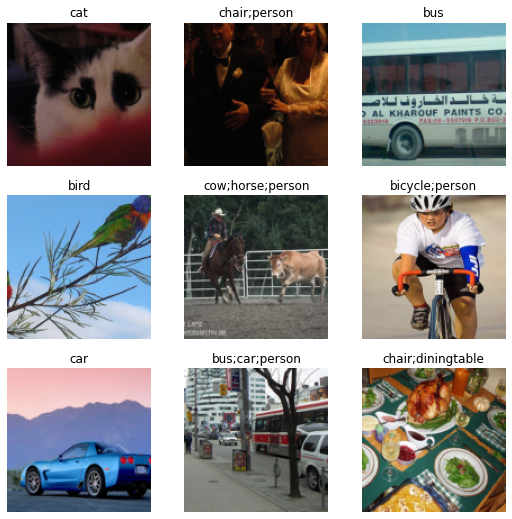

In [47]:
dls.show_batch(nrows=3, ncols=3)